# Dataset

#### This dataset represents a supply chain management system, capturing details across procurement, inventory, manufacturing, logistics, and customer orders. It includes information about products, stock availability, sales performance, supplier details, shipping, manufacturing costs, and quality control.

## Column-wise Information

### Product type (object)

Category of product (e.g., skincare, haircare, cosmetics).

### SKU (object)

Unique Stock Keeping Unit identifier for each product.

### Price (float64)

Price of the product (in currency units).

### Availability (int64)

Number of units available in stock.

### Number of products sold (int64)

Total units sold for the SKU.

### Revenue generated (float64)

Revenue from the product (Price × Units Sold).

### Customer demographics (object)

Segment information like Age group, Gender, or Unknown.

### Stock levels (int64)

Current stock level in inventory.

### Lead times (int64)

Time taken (in days) for stock replenishment.

### Order quantities (int64)

Quantity ordered during procurement.

### Shipping times (int64)

Average shipping time (in days) to customers.

### Shipping carriers (object)

Name of the shipping company (e.g., Carrier A, Carrier B).

### Shipping costs (float64)

Cost of shipping per order.

### Supplier name (object)

Name of the product supplier.

### Location (object)

Supplier location (e.g., Kolkata, Mumbai).

### Lead time (int64)

Supplier lead time for procurement.

### Production volumes (int64)

Total production volume for the product.

### Manufacturing lead time (int64)

Time (in days) taken for manufacturing.

### Manufacturing costs (float64)

Cost incurred for manufacturing the product.

### Inspection results (object)

Status of quality inspection (e.g., Passed, Failed, Pending).

### Defect rates (float64)

Percentage of defective products.

### Transportation modes (object)

Mode of transportation (Air, Road, Rail).

### Routes (object)

Transportation route details (Route A , Route B , Route C)

### Costs (float64)

Additional transportation or handling costs.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-dataset/supply_chain_data.csv


In [2]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
pio.templates.default = "plotly_white"

In [3]:
data = pd.read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

In [7]:
data.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [8]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


### Sales by Product Type

In [9]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type', 
                   title='Sales by Product Type', 
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
                   

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show() 

#### So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetic

## Total Revenue by shipping Carrier

In [10]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'], 
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier', 
                  xaxis_title='Shipping Carrier', 
                  yaxis_title='Revenue Generated')
fig.show()

### Product type
The company is using three carriers for transportation, and Carrier B helps the company in generating more revenue. Now let’s have a look at the Average lead time and Average Manufacturing Costs for all products of the company:

In [11]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


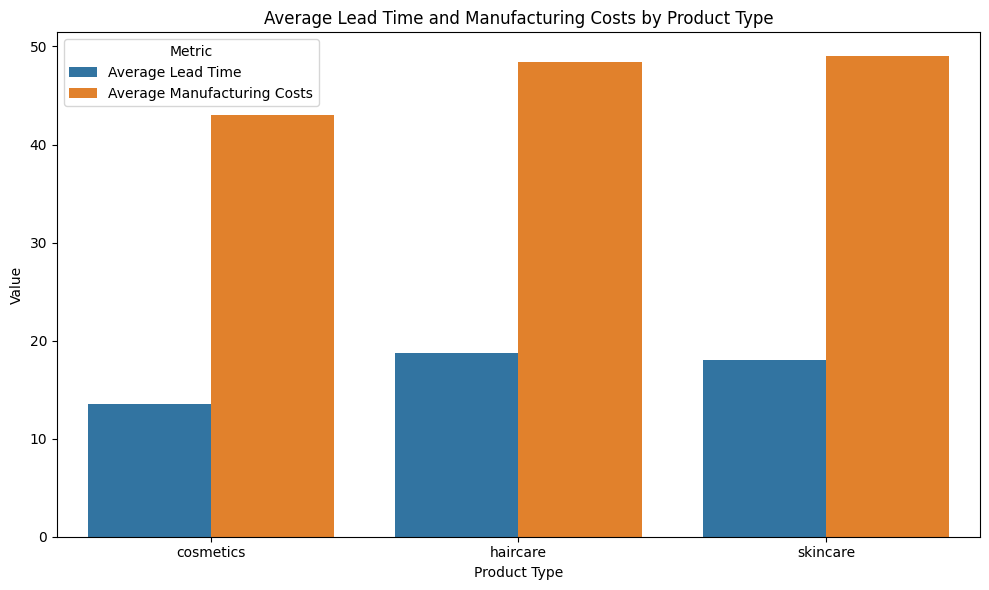

In [14]:
import seaborn as sns
# Melt the DataFrame to long format
melted = result.melt(id_vars='Product type', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='Value', hue='Metric', data=melted)

plt.title('Average Lead Time and Manufacturing Costs by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Value')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### Analyzing SKUs
There’s a column in the dataset as SKUs. You must have heard it for the very first time. So, SKU stands for Stock Keeping Units. They’re like special codes that help companies keep track of all the different things they have for sale. Imagine you have a large toy store with lots of toys. Each toy is different and has its name and price, but when you want to know how many you have left, you need a way to identify them. So you give each toy a unique code, like a secret number only the store knows. This secret number is called SKU.






# Revenue generated by SKU

In [15]:
revenue_chart = px.line(data, x='SKU', 
                        y='Revenue generated', 
                        title='Revenue Generated by SKU')
revenue_chart.show()

### Stock Levels by SKU
Stock levels refer to the number of products a store or business has in its inventory. Now let’s have a look at the stock levels of each SKU:

In [16]:
stock_chart = px.line(data, x='SKU', 
                      y='Stock levels', 
                      title='Stock Levels by SKU')
stock_chart.show()

### Order Quantity by SKU

In [17]:
order_quantity_chart = px.bar(data, x='SKU', 
                              y='Order quantities', 
                              title='Order Quantity by SKU')
order_quantity_chart.show()

# Shipping Costs by Carrier

In [18]:
shipping_cost_chart = px.bar(data, x='Shipping carriers', 
                             y='Shipping costs', 
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show()

#### In one of the above visualizations, we discovered that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three

## Cost Distribution by Transportation Mode

In [19]:
transportation_chart = px.pie(data, 
                              values='Costs', 
                              names='Transportation modes', 
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

#### So the company spends more on Road and Rail modes of transportation for the transportation of Goods.

# Analyzing Defect Rate
#### The defect rate in the supply chain refers to the percentage of products that have something wrong or are found broken after shipping.

In [20]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show()

#### So the defect rate of haircare products is higher.

# Defect Rates by Transportation Mode

In [21]:
pivot_table = pd.pivot_table(data, values='Defect rates', 
                             index=['Transportation modes'], 
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"], 
                              names=pivot_table.index, 
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

#### Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate

# Summary
#### Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers.